In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configure matplotlib for better visualization
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Create directories
os.makedirs('models', exist_ok=True)
os.makedirs('results/part_1', exist_ok=True)
os.makedirs('logs', exist_ok=True)

In [29]:
import tensorflow_datasets as tfds
emnist_dataset, emnist_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    as_supervised=True,  # Returns tuple (img, label) instead of dict
    with_info=True,      # Includes dataset metadata
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

NonMatchingChecksumError: Artifact https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip, downloaded to C:\Users\kevxs\tensorflow_datasets\downloads\itl.nist.gov_iaui_vip_cs_links_EMNIST_gzipi4VnNviDSrfd9Zju6qv40flc3wr22t8ldulNStS6tmk.zip.tmp.8149c30f992b44e9b1267fd101c31d91\itl, has wrong checksum:
* Expected: UrlInfo(size=535.73 MiB, checksum='fb9bb67e33772a9cc0b895e4ecf36d2cf35be8b709693c3564cea2a019fcda8e', filename='gzip.zip')
* Got: UrlInfo(size=104.24 KiB, checksum='4237e1e7e186561cae8ff6e64d909029aecf5e856201cec285eadb46c72ce395', filename='itl')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

Training data shape before processing: (88800, 785)
Test data shape before processing: (14800, 785)
x_train shape: (88800, 28, 28)
y_train shape: (88800,)
x_test shape: (14800, 28, 28)
y_test shape: (14800,)
Training data shape: (88800, 28, 28)
Test data shape: (14800, 28, 28)
Number of classes: 26


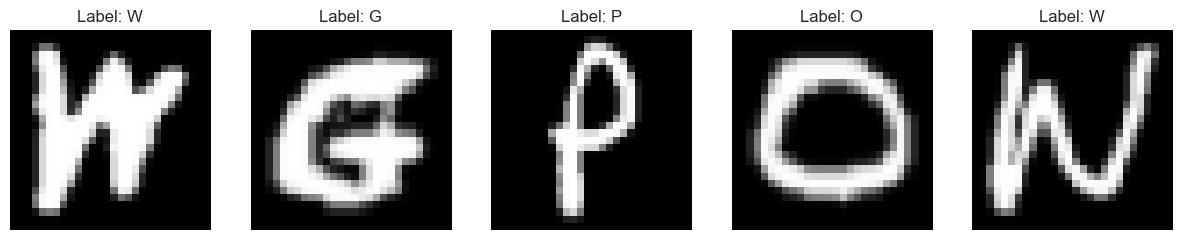

In [2]:
# Load EMNIST dataset
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.emnist.load_data('letters')

# Set the working directory
os.chdir(r'C:\Users\kevxs\OneDrive\Documents\DATASCI 223\6-neural-nets-kxshi')

# had to manually download my data... none of the package methods worked
train_data = pd.read_csv('emnist-letters-train.csv', header=None)
test_data = pd.read_csv('emnist-letters-test.csv', header=None)

# Print the shapes to verify
print(f"Training data shape before processing: {train_data.shape}")
print(f"Test data shape before processing: {test_data.shape}")

# Separate the labels (first column) and pixel values (remaining columns)
x_train = train_data.iloc[:, 1:].values  
y_train = train_data.iloc[:, 0].values   

x_test = test_data.iloc[:, 1:].values   
y_test = test_data.iloc[:, 0].values    

x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Verify the shapes of the data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Print dataset information
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Plot sample images
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i].T, cmap='gray')
    plt.title(f'Label: {chr(y_train[i] + 64)}')
    plt.axis('off')
plt.show()

In [3]:
# Preprocess data

# Reshape for dense layers
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train - 1, num_classes=26)
y_test = tf.keras.utils.to_categorical(y_test - 1, num_classes=26)

# Split training data into train and validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

print(f"Preprocessed training data shape: {x_train.shape}")
print(f"Preprocessed validation data shape: {x_val.shape}")
print(f"Preprocessed test data shape: {x_test.shape}")

Preprocessed training data shape: (71040, 784)
Preprocessed validation data shape: (17760, 784)
Preprocessed test data shape: (14800, 784)


In [4]:
# Create simple neural network
def create_simple_nn(input_shape, num_classes):
    """
    Create a simple neural network for EMNIST classification.
    
    Requirements:
    - Must use at least 2 dense layers
    - Must include dropout layers
    - Must use categorical crossentropy loss
    
    Goals:
    - Achieve > 80% accuracy on test set
    - Minimize overfitting using dropout
    - Train efficiently with appropriate batch size
    
    Args:
        input_shape: Shape of input data (should be (784,) for flattened 28x28 images)
        num_classes: Number of output classes (26 for letters)
    
    Returns:
        Compiled Keras model
    """
    #model = tf.keras.Sequential([...])
    
    #model.compile(...)

    model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = input_shape),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation = 'softmax')
           
    ])
    
    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    
    return model

In [7]:
model = create_simple_nn(input_shape=(784,), num_classes=26)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,930 (2.06 MB)

 Trainable params: 539,930 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6448 - loss: 1.1871 - val_accuracy: 0.8667 - val_loss: 0.4324 - learning_rate: 0.0010
Epoch 2/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8379 - loss: 0.5118 - val_accuracy: 0.8810 - val_loss: 0.3740 - learning_rate: 0.0010
Epoch 3/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8629 - loss: 0.4218 - val_accuracy: 0.8970 - val_loss: 0.3320 - learning_rate: 0.0010
Epoch 4/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8782 - loss: 0.3723 - val_accuracy: 0.8990 - val_loss: 0.3224 - learning_rate: 0.0010
Epoch 5/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8859 - loss: 0.3423 - val_accuracy: 0.9002 - val_loss: 0.3197 - learning_rate: 0.0010
Epoch 6/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8908 - loss: 0.3206 - val_accuracy: 0.9019 - val_loss: 0.3207 - learning_rate: 0.0010
Epoch 7/20
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8976 - l

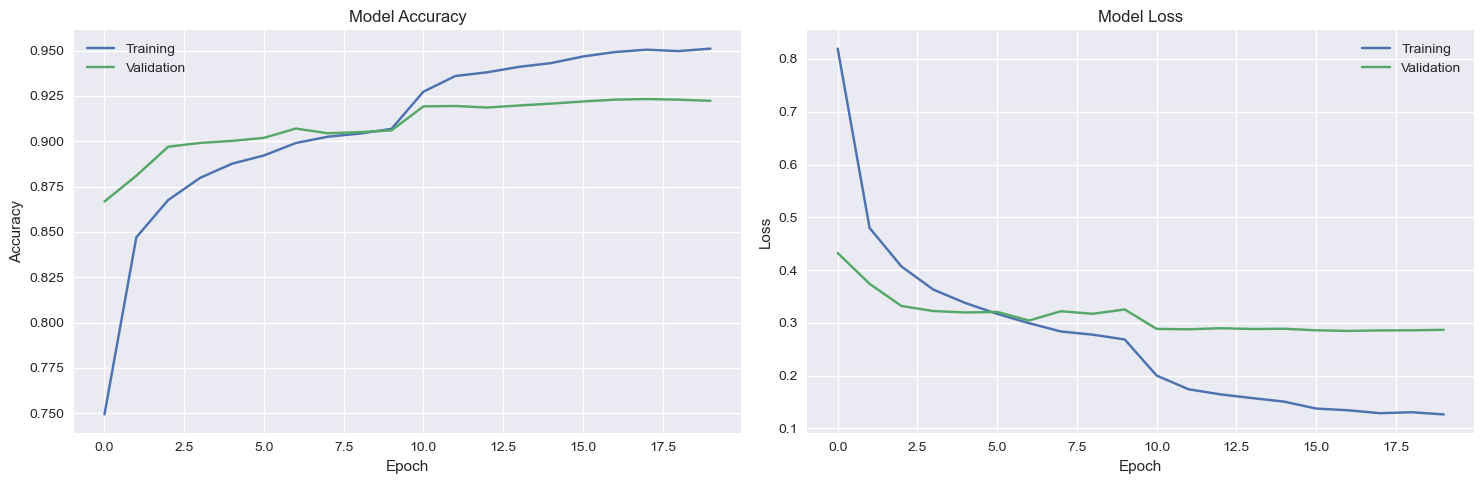

In [8]:
# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'models/emnist_classifier.keras',
        save_best_only=True
    )
]

# Train model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=callbacks
)

# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history.history['loss'], label='Training')
ax2.plot(history.history['val_loss'], label='Validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9129 - loss: 0.3310
Test accuracy: 0.9058
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\kevxs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


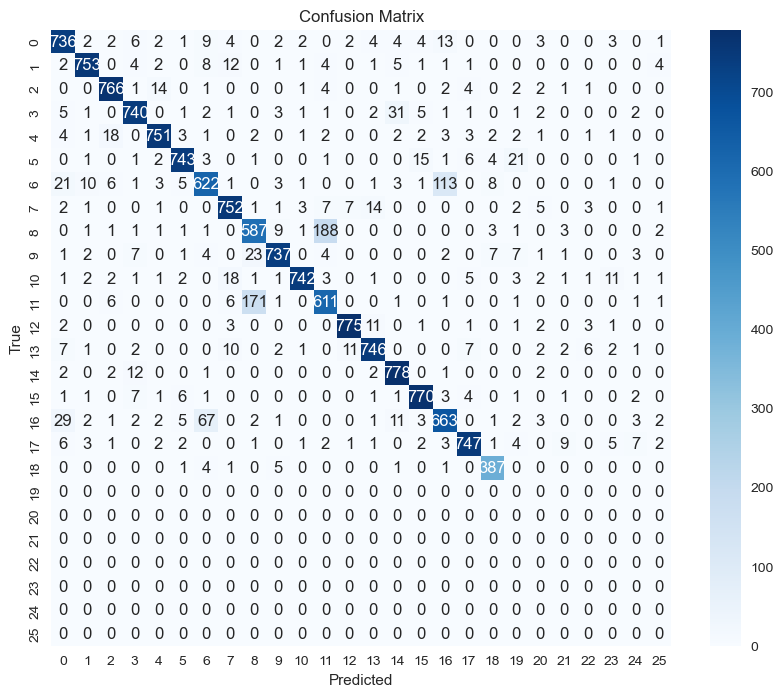

{'model': 'emnist_classifier', 'accuracy': 0.9058108329772949, 'precision': 0.6701985551253653, 'recall': 0.6631250000000001, 'f1_score': 0.6664546784723826, 'confusion_matrix': [[736, 2, 2, 6, 2, 1, 9, 4, 0, 2, 2, 0, 2, 4, 4, 4, 13, 0, 0, 0, 3, 0, 0, 3, 0, 1], [2, 753, 0, 4, 2, 0, 8, 12, 0, 1, 1, 4, 0, 1, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4], [0, 0, 766, 1, 14, 0, 1, 0, 0, 0, 1, 4, 0, 0, 1, 0, 2, 4, 0, 2, 2, 1, 1, 0, 0, 0], [5, 1, 0, 740, 0, 1, 2, 1, 0, 3, 1, 1, 0, 2, 31, 5, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0], [4, 1, 18, 0, 751, 3, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 3, 3, 2, 2, 1, 0, 1, 1, 0, 0], [0, 1, 0, 1, 2, 743, 3, 0, 1, 0, 0, 1, 0, 0, 0, 15, 1, 6, 4, 21, 0, 0, 0, 0, 1, 0], [21, 10, 6, 1, 3, 5, 622, 1, 0, 3, 1, 0, 0, 1, 3, 1, 113, 0, 8, 0, 0, 0, 0, 1, 0, 0], [2, 1, 0, 0, 1, 0, 0, 752, 1, 1, 3, 7, 7, 14, 0, 0, 0, 0, 0, 2, 5, 0, 3, 0, 0, 1], [0, 1, 1, 1, 1, 1, 1, 0, 587, 9, 1, 188, 0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 2], [1, 2, 0, 7, 0, 1, 4, 0, 23, 737, 0, 4, 0, 0, 0, 0, 2, 0, 7, 7, 1, 1,

In [10]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Get predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = tf.math.confusion_matrix(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save metrics
metrics = {
    'model': 'emnist_classifier',
    'accuracy': float(test_accuracy),
    'precision': float(precision),
    'recall': float(recall),
    'f1_score': float(f1),
    'confusion_matrix': cm.numpy().tolist()
}

# Save to file
with open('results/part_1/emnist_classifier_metrics.txt', 'w') as f:
    f.write(f"model: {metrics['model']}\n")
    f.write(f"accuracy: {metrics['accuracy']}\n")
    f.write(f"precision: {metrics['precision']}\n")
    f.write(f"recall: {metrics['recall']}\n")
    f.write(f"f1_score: {metrics['f1_score']}\n")
    f.write(f"confusion_matrix: {metrics['confusion_matrix']}\n")
    f.write("----\n")

print(metrics)